# Iris classification
> 鸢尾花分类--使用全连接模型, Pytorch模型， CPU上训练

测试集上准确度：0.9666666666666667

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集
导入数据集并查看数据集信息, 对数据集进行分析

In [7]:
dataset = pd.read_csv("../dataset/iris.data")

In [8]:
dataset.columns = [
    "sepal length(cm)",
    "sepal width(cm)",
    "petal length(cm)",
    "petal width(cm)",
    "species",
]
dataset.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
# Transform species data to numeric values
mappings = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset["species"] = dataset["species"].apply(lambda x: mappings[x])
dataset.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


对数据集进行可视化分析.

Index(['sepal length(cm)', 'sepal width(cm)', 'petal length(cm)',
       'petal width(cm)', 'species'],
      dtype='object')


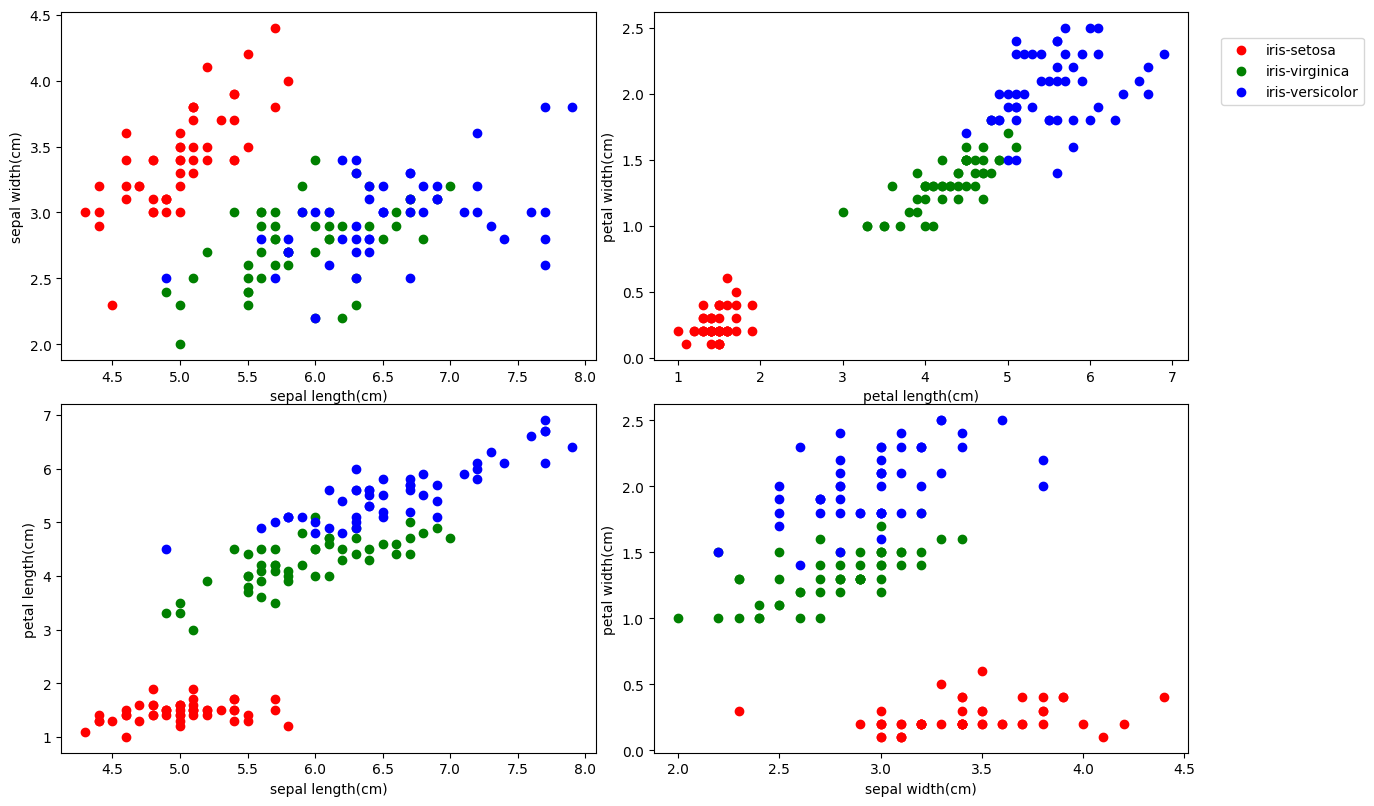

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.tight_layout()

plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
colors = ["r", "g", "b"]
labels = ["iris-setosa", "iris-virginica", "iris-versicolor"]
print(dataset.columns)

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(
            dataset[dataset["species"] == j][x],
            dataset[dataset["species"] == j][y],
            color=colors[j],
        )
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()

- 通过可视化结果, 可以看到iris-setosa从另外两种花中可以明显区分开来.
- Iris virginica是最长的花, Iris setosa是最短的.

In [15]:
# loading dataset
X=dataset.drop("species",axis=1).values
y=dataset["species"].values

# split dataset to training and test set by ratio 8:2
# Using scikit-learn's random train and test split function
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train = torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

# 搭建全链接模型

模型由三层组成, 前两层使用 ReLU 激活函数, 第三层使用 Softmax 作为激活函数输出分类结
果.

- 第一层全连接层输入特征为4, 输出为25;
- 第二层全连接层输入特征为25, 输出特征为30;
- 第三层全连接层输入特征为30, 输出特征为3;

In [16]:
class Model(nn.Module):
    def __init__(self, input_feats=4, hidden_layer1=25, hidden_layer2=30, output_feats=3) -> None:
        super().__init__()
        self.fc1 = nn.Linear(input_feats, hidden_layer1)
        self.fc2=nn.Linear(hidden_layer1, hidden_layer2)
        self.out=nn.Linear(hidden_layer2, output_feats)
        
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)

        return x

In [17]:
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=3, bias=True)
)

In [18]:
# Adam optimizer, learning rate=0.01
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

# 训练模型
在数据集上进行100轮训练

In [19]:
epochs=100
losses=[]
for i in range(epochs):
    y_pred=model.forward(X_train)
    loss=criterion(y_pred,y_train)
    losses.append(loss)
    print(f'epoch: {i:2} loss: {loss.item():10.8f}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss: 1.07880127
epoch:  1 loss: 0.99530464
epoch:  2 loss: 0.93395382
epoch:  3 loss: 0.87158877
epoch:  4 loss: 0.80697405
epoch:  5 loss: 0.73825341
epoch:  6 loss: 0.66753036
epoch:  7 loss: 0.60140502
epoch:  8 loss: 0.54559052
epoch:  9 loss: 0.49762520
epoch: 10 loss: 0.45678517
epoch: 11 loss: 0.42075697
epoch: 12 loss: 0.38821664
epoch: 13 loss: 0.35862112
epoch: 14 loss: 0.33107480
epoch: 15 loss: 0.30519435
epoch: 16 loss: 0.28274354
epoch: 17 loss: 0.26062825
epoch: 18 loss: 0.23899034
epoch: 19 loss: 0.22006868
epoch: 20 loss: 0.20076425
epoch: 21 loss: 0.18431266
epoch: 22 loss: 0.16772504
epoch: 23 loss: 0.15393740
epoch: 24 loss: 0.14070341
epoch: 25 loss: 0.13031510
epoch: 26 loss: 0.12001187
epoch: 27 loss: 0.11237890
epoch: 28 loss: 0.10497826
epoch: 29 loss: 0.09937707
epoch: 30 loss: 0.09430575
epoch: 31 loss: 0.08988739
epoch: 32 loss: 0.08669277
epoch: 33 loss: 0.08330768
epoch: 34 loss: 0.08091813
epoch: 35 loss: 0.07882623
epoch: 36 loss: 0.07669885
e

对训练过程中的loss变化进行可视化, 可以看到在大约40轮后模型就已经接近收敛, 后面的训练对loss的降低效果不明显;

Text(0.5, 0, 'epoch')

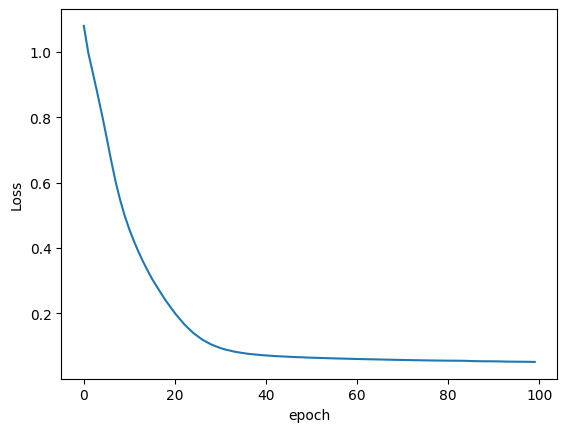

In [25]:
detached_loss = [x.detach().numpy() for x in losses]
# detached_loss = losses
plt.plot(range(epochs), detached_loss)
plt.ylabel('Loss')
plt.xlabel('epoch')

# 验证和测试模型
对模型在验证集和测试集上进行测试, 检测模型的拟合效果.

In [26]:
preds=[]
with torch.no_grad():
    for val in X_test:
        y_hat=model.forward(val)
        preds.append(y_hat.argmax().item())

In [27]:
df=pd.DataFrame({'Y': y_test, 'Y_hat':preds})
df['Correct']=[1 if corr==pred else 0 for corr, pred in zip(df['Y'], df['Y_hat'])]
df

,Y,Y_hat,Correct
0,2,2,1
1,0,0,1
2,0,0,1
3,2,2,1
4,2,2,1
5,0,0,1
6,2,2,1
7,1,1,1
8,1,1,1
9,1,1,1


In [28]:
# Accuracy

df['Correct'].sum()/len(df)

0.9666666666666667

# 使用模型来分类没有见过的新数据

In [29]:
unknown_iris = torch.tensor([4.0,3.3,1.7,0.5])

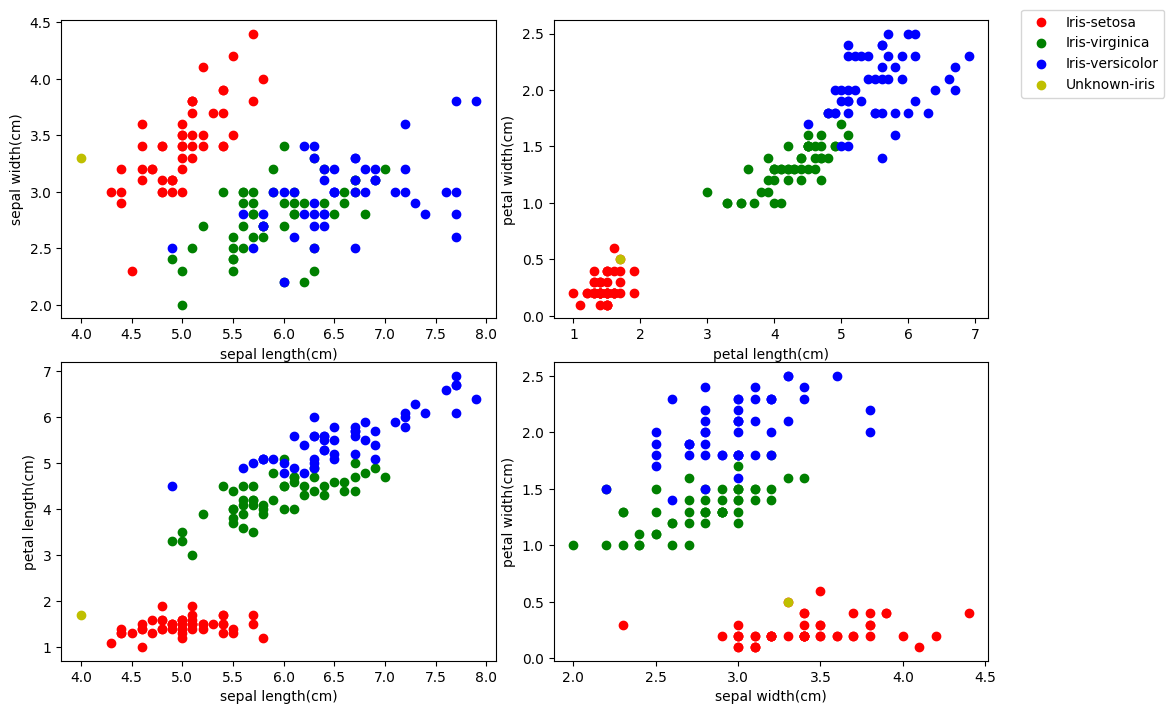

In [30]:
fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(10,7))
fig.tight_layout()

plots=[(0,1),(2,3),(0,2),(1,3)]
colors=['r','g','b']
labels=['Iris-setosa','Iris-virginica','Iris-versicolor','Unknown-iris']
for i,ax in enumerate(axes.flat):
    for j in range(3):
        x=dataset.columns[plots[i][0]]
        y=dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset['species']==j][x], dataset[dataset['species']==j][y],color=colors[j])
        ax.set(xlabel=x,ylabel=y)
        
    # Add a plot for unknown iris
    ax.scatter(unknown_iris[plots[i][0]], unknown_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels,loc=3,bbox_to_anchor=(1.0,0.85))
plt.show()

未知鸢尾花被分类为红点类(Iris-setosa).

In [31]:
with torch.no_grad():
    print(model(unknown_iris),'\n')
    print(labels[model(unknown_iris).argmax()])

tensor([ 11.3244,   5.7368, -17.0120]) 

Iris-setosa
